In [1]:
!pip install openpyxl --upgrade

In [2]:
!pip install pandas --upgrade

In [3]:
from google.colab import files

arquivo = files.upload() # IMPORTAÇÃO DA PLANILHA COM OS DADOS DE TX DE MORTALIDADE BRUTA

Saving tx_bruta_mort1.xlsx to tx_bruta_mort1.xlsx


In [4]:
nome=list(arquivo.keys())[0]  # IMPRIME O NOME DO ARQUIVO IMPORTADO (.XLSX)
nome

'tx_bruta_mort1.xlsx'

In [5]:
import io  # IO serve para lidar com vários tipos de E/S.
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
tabela = pd.read_excel(io.BytesIO(arquivo[nome])) #TRANSFORMA PLANILHA EM DATA FRAME 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import math as mat

In [7]:
tabela_mun_2021 = tabela[['Município', '2021']]
tabela_mun_2021.columns = ['Município', 'Taxa 2021']
tabela_mun_2021.head(10)
with pd.option_context('display.max_rows', 10, 'display.max_columns', 2):
    print(tabela_mun_2021)

             Município  Taxa 2021
0       Angra dos Reis   6.380286
1              Aperibé   9.410974
2             Araruama  10.998339
3                Areal  10.498066
4   Armação dos Búzios   9.571598
..                 ...        ...
87           Três Rios  11.041854
88             Valença  11.278929
89           Varre-Sai   5.132361
90           Vassouras  12.593372
91       Volta Redonda  11.307065

[92 rows x 2 columns]


In [8]:
q1 = tabela['2021'].quantile(0.25)
q2 = tabela['2021'].quantile(0.5)
q3 = tabela['2021'].quantile(0.75)
q4 = q3-q1
print('Primeiro quartil ', q1)
print('Segundo quartil', q2)
print('Terceiro quartil ', q3)
print('Amplitude interquartílica ', q4)

Primeiro quartil  9.048224950013095
Segundo quartil 10.090291378224276
Terceiro quartil  11.285962951104374
Diferença interquartílica  2.2377380010912784


In [9]:
tabela_mun_2021.loc[tabela['2021'] <= q1,'Quartil']='Primeiro Quartil'  
tabela_mun_2021.loc[(tabela['2021'] > q1) & (tabela['2021'] <= q2),'Quartil'] ='Segundo quartil'
tabela_mun_2021.loc[(tabela['2021'] > q2) & (tabela['2021'] < q3),'Quartil'] ='Segundo quartil'
tabela_mun_2021.loc[tabela['2021'] >= q3,'Quartil']='Terceiro Quartil'  

In [10]:
print(tabela_mun_2021)

             Município  Taxa 2021           Quartil
0       Angra dos Reis   6.380286  Primeiro Quartil
1              Aperibé   9.410974   Segundo quartil
2             Araruama  10.998339   Segundo quartil
3                Areal  10.498066   Segundo quartil
4   Armação dos Búzios   9.571598   Segundo quartil
..                 ...        ...               ...
87           Três Rios  11.041854   Segundo quartil
88             Valença  11.278929   Segundo quartil
89           Varre-Sai   5.132361  Primeiro Quartil
90           Vassouras  12.593372  Terceiro Quartil
91       Volta Redonda  11.307065  Terceiro Quartil

[92 rows x 3 columns]


In [27]:
media_a=tabela_mun_2021['Taxa 2021'].mean()
med_a=tabela_mun_2021['Taxa 2021'].median()
moda_a=tabela_mun_2021['Taxa 2021'].mode()
min_a=tabela_mun_2021['Taxa 2021'].min()
max_a=tabela_mun_2021['Taxa 2021'].max()
var_ano = tabela_mun_2021['Taxa 2021'].var()      # VARIÂNCIA AMOSTRAL
dp_ano  = tabela_mun_2021['Taxa 2021'].std()      # DESVIO PADRÃO AMOSTRAL
grafico=tabela_mun_2021['Taxa 2021']
cv=dp_ano/media_a  
print("média_ano:{:.4f}".format(media_a))
print("min_ano:{:.4f}".format(min_a))
print("max_ano:{:.4f}".format(max_a))
print("mediana_ano:{:.4f}".format(med_a))

print()
print("Var_ano:{:.4f}".format(var_ano))
print("DP_ano:{:.4f}".format(dp_ano))
print("CV_ano:{:.4f}".format(cv)) 

média_ano:10.1343
min_ano:5.1324
max_ano:14.5646
mediana_ano:10.0903

Var_ano:3.3564
DP_ano:1.8320
CV_ano:0.1808


{'boxes': [<matplotlib.lines.Line2D at 0x7ff72b6efc90>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff72b6f5cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff72b67dd10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff72b67d7d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff72b6f5250>,
  <matplotlib.lines.Line2D at 0x7ff72b6f5790>]}

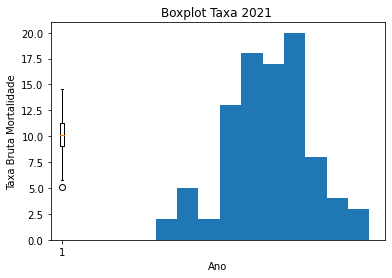

In [33]:
# HISTOGRAMA - Taxa
plt.title("Histograma Taxa 2021 ", loc="center", fontsize=12)
plt.xlabel("Taxa Bruta Mortalidade")
plt.ylabel("Frequência")
plt.hist(grafico)


{'boxes': [<matplotlib.lines.Line2D at 0x7ff72b669110>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff72b671150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff72b679190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff72b671c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff72b669690>,
  <matplotlib.lines.Line2D at 0x7ff72b669bd0>]}

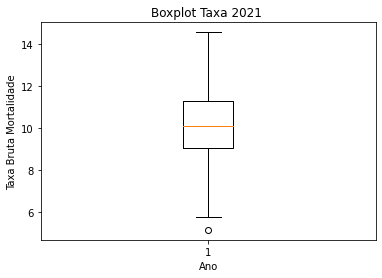

In [34]:
# BOXPLOT   
plt.title("Boxplot Taxa 2021 ", loc="center", fontsize=12)
plt.xlabel("Ano")
plt.ylabel("Taxa Bruta Mortalidade")
plt.boxplot(grafico)